In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import math
from scipy.signal import savgol_filter
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Number_of_node=1000
Number_of_step=40001#becuase start since 0
dw_left_cut=276
dw_Right_cut=724
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
font_path = './fonts/times.ttf'
font_prop = FontProperties(fname=font_path)
font_name = font_prop.get_name()
fonts = font_prop.get_name()
font1 = {'family': font_prop.get_name(), 'color': '#000000', 'weight': 'normal'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def read_data(Lx):
    Matrix_sor_0_2PI = [[0 for x in range(Number_of_node)] for y in range(Number_of_step)] 
    Degree=1.57 #degree alpha
    Degree_data='Degree_Radian='+str(Degree)#string degree
    copling=2.11 #coupling in layers
    file_name=Degree_data+'_copling='+str(copling)+'layer'+Lx+'(time)VS(Node)'
    address=r'./Data/Forward/'
    data=np.loadtxt(address+'Save/Phases/'+file_name+'.txt')
    for timeforloop in range(0, Number_of_step):
        for y in range(1, Number_of_node+1):#for timeforloop step  
            Matrix_sor_0_2PI[timeforloop][y-1]=data[timeforloop][y]%(2*math.pi)
    return Matrix_sor_0_2PI
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def syncronization(Matrix_sor_0_2PI):
    Number_total=[0 for y in range(Number_of_step)]#total sync
    Total_sync=[0 for y in range(Number_of_step)]#total sync
    left_sync=[0 for y in range(Number_of_step)]
    mid_sync=[0 for y in range(Number_of_step)]
    right_sync=[0 for y in range(Number_of_step)]
    for timeforloop in range(0, Number_of_step):
        rc = 0.0
        rs = 0.0
        for y in range(0, Number_of_node):#for timeforloop step  
            rc=rc+math.cos(Matrix_sor_0_2PI[timeforloop][y])
            rs=rs+math.sin(Matrix_sor_0_2PI[timeforloop][y])
        Number_total[timeforloop]=(timeforloop/100)#doroste
        Total_sync[timeforloop]=(math.sqrt(math.pow(rc, 2) + math.pow(rs, 2)) / (Number_of_node))
    for timeforloop in range(0, Number_of_step):
        rc = 0.0
        rs = 0.0
        for y in range(0,dw_left_cut):#for timeforloop step  
            rc=rc+math.cos(Matrix_sor_0_2PI[timeforloop][y])
            rs=rs+math.sin(Matrix_sor_0_2PI[timeforloop][y])
        left_sync[timeforloop]=(math.sqrt(math.pow(rc, 2) + math.pow(rs, 2)) / (dw_left_cut))    
    for timeforloop in range(0, Number_of_step):
        rc = 0.0
        rs = 0.0
        for y in range(dw_left_cut,dw_Right_cut):#for timeforloop step  
            rc=rc+math.cos(Matrix_sor_0_2PI[timeforloop][y])
            rs=rs+math.sin(Matrix_sor_0_2PI[timeforloop][y])
        mid_sync[timeforloop]=(math.sqrt(math.pow(rc, 2) + math.pow(rs, 2)) / (dw_Right_cut-dw_left_cut))    
    for timeforloop in range(0, Number_of_step):
        rc = 0.0
        rs = 0.0
        for y in range(dw_Right_cut,Number_of_node):#for timeforloop step  
            rc=rc+math.cos(Matrix_sor_0_2PI[timeforloop][y])
            rs=rs+math.sin(Matrix_sor_0_2PI[timeforloop][y])
        right_sync[timeforloop]=(math.sqrt(math.pow(rc, 2) + math.pow(rs, 2)) / (Number_of_node-dw_Right_cut))   
    return Number_total,Total_sync,left_sync,mid_sync,right_sync
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Data2=read_data('2')
Number_total,Total_sync,left_sync,mid_sync,right_sync=syncronization(Data2)

Data1=read_data('1')


plot_sync


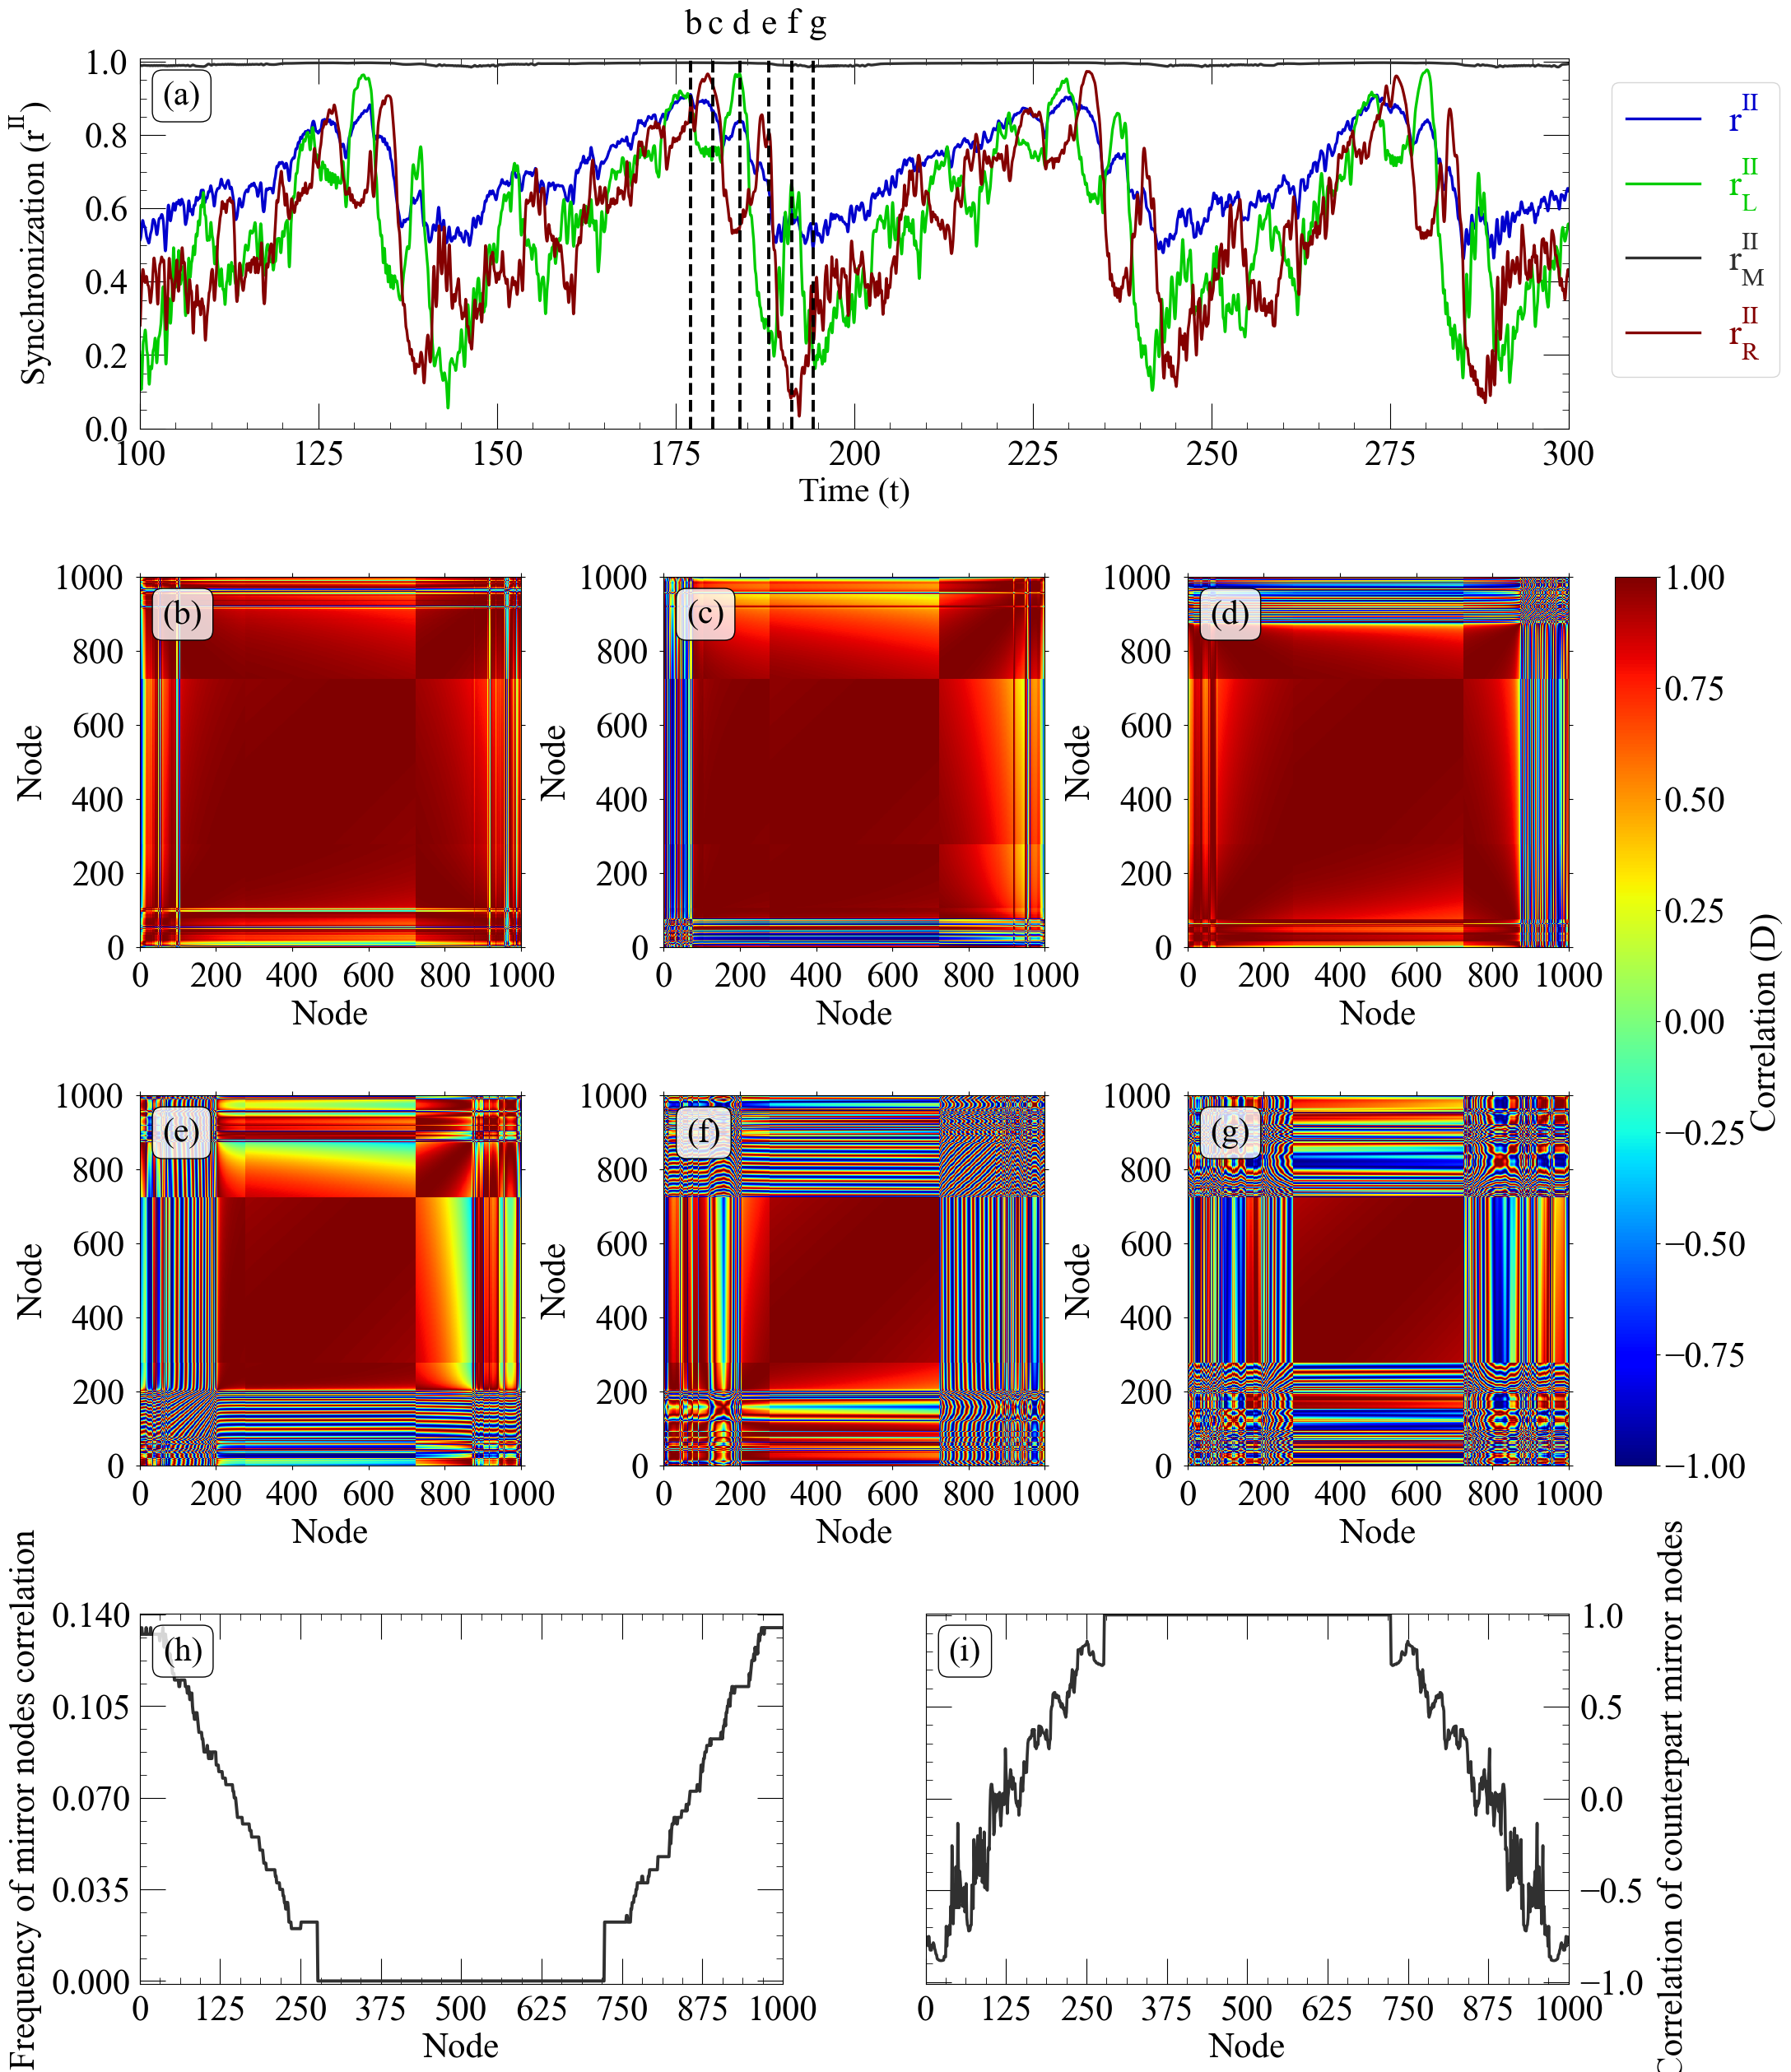

In [67]:

from scipy.signal import hilbert, chirp
from matplotlib.ticker import AutoMinorLocator,MaxNLocator, MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import math
font_path = './fonts/times.ttf'
font_prop = FontProperties(fname=font_path)
font_name = font_prop.get_name()
fonts = font_prop.get_name()
font1 = {'family': font_prop.get_name(), 'color': '#000000', 'weight': 'normal'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

def plot_framework(number_of_pic):
    if number_of_pic==1:
        ax = plt.subplot2grid(shape=(4,6), loc=(0,0), colspan=6)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(np.arange(100, 325, 25),font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==2:
        ax = plt.subplot2grid((4,6), (1,0), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==3:
        ax = plt.subplot2grid((4,6), (1,2), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==4:
        ax = plt.subplot2grid((4,6), (1,4), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==5:
        ax = plt.subplot2grid((4,6), (2,0), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==6:
        ax = plt.subplot2grid((4,6), (2,2), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==7:
        ax = plt.subplot2grid((4,6), (2,4), colspan=2)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
        plt.xticks(font=fonts,fontsize=31,color= '#000000')
        plt.yticks(font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==8:
        ax = plt.subplot2grid((4,6), (3,0), colspan=3)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=8)
        plt.xticks(np.arange(0, 1250, 125),font=fonts,fontsize=31,color= '#000000')
        plt.yticks(np.arange(-0, 0.175, 0.035),font=fonts,fontsize=31,color= '#000000')
    if number_of_pic==9:
        ax = plt.subplot2grid((4,6), (3,3), colspan=3)
        plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
        plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=True, pad=10)
        plt.xticks(np.arange(0, 1250, 125),font=fonts,fontsize=31,color= '#000000')
        plt.yticks(np.arange(-1, 1.5, 0.5),font=fonts,fontsize=31,color= '#000000')
    return ax

def text_plot(axes):
    # Add text annotations for each subplot
    annotations = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)', '(i)']
    for i, ax in enumerate(axes):
        if i==0:
            ax.text(0.016, 0.94, annotations[i], fontdict=font1, fontsize=30,
                transform=ax.transAxes, ha='left', va='top',
                bbox=dict(boxstyle="round", ec="#000000", fc=(1, 1, 1, 0.80)))
        if i>6 :
            ax.text(0.036, 0.94, annotations[i], fontdict=font1, fontsize=30,
                transform=ax.transAxes, ha='left', va='top',
                bbox=dict(boxstyle="round", ec="#000000", fc=(1, 1, 1, 0.80)))
        elif i>0 and i<7:
            ax.text(0.06, 0.94, annotations[i], fontdict=font1, fontsize=30,
                transform=ax.transAxes, ha='left', va='top',
                bbox=dict(boxstyle="round", ec="#000000", fc=(1, 1, 1, 0.80)))


fig = plt.figure()

axes=[plot_framework(i) for i in range(1, 10)]


'''fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot2grid(shape=(4,6), loc=(0,0), colspan=6)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(np.arange(100, 325, 25),font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax2 = plt.subplot2grid((4,6), (1,0), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax3 = plt.subplot2grid((4,6), (1,2), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax4 = plt.subplot2grid((4,6), (1,4), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax5 = plt.subplot2grid((4,6), (2,0), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax6 = plt.subplot2grid((4,6), (2,2), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax7 = plt.subplot2grid((4,6), (2,4), colspan=2)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=10)
plt.xticks(font=fonts,fontsize=31,color= '#000000')
plt.yticks(font=fonts,fontsize=31,color= '#000000')
ax8 = plt.subplot2grid((4,6), (3,0), colspan=3)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=8)
plt.xticks(np.arange(0, 1250, 125),font=fonts,fontsize=31,color= '#000000')
plt.yticks(np.arange(-0, 0.175, 0.035),font=fonts,fontsize=31,color= '#000000')
ax9 = plt.subplot2grid((4,6), (3,3), colspan=3)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=10)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=True, pad=10)
plt.xticks(np.arange(0, 1250, 125),font=fonts,fontsize=31,color= '#000000')
plt.yticks(np.arange(-1, 1.5, 0.5),font=fonts,fontsize=31,color= '#000000')'''


step1=18020
step2=18400
step3=18799
step4=19122
step6=19429
step7=17705

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def plot_sync_time(ax,Number_total,Total_sync,left_sync,mid_sync,right_sync):
    print("plot_sync")
    colors = []
    line, = ax.plot(Number_total, savgol_filter(Total_sync, 80, 2),  color='#0000CD', label='$\mathrm{r}^\mathrm{II}$', linewidth = '2.4')#151575
    colors.append(plt.getp(line,'color'))
    line, = ax.plot(Number_total, savgol_filter(left_sync, 80, 2), color="#00CC00", label='$\mathrm{r}^\mathrm{II}_\mathrm{L}$', linewidth = '2.4')#298929
    colors.append(plt.getp(line,'color'))
    line, = ax.plot(Number_total, savgol_filter(mid_sync, 80, 2), color="#303030", label='$\mathrm{r}^\mathrm{II}_\mathrm{M}$', linewidth = '2.4')
    colors.append(plt.getp(line,'color'))
    line, = ax.plot(Number_total, savgol_filter(right_sync, 80, 2), color="#840000", label='$\mathrm{r}^\mathrm{II}_\mathrm{R}$', linewidth = '2.4')#751515
    colors.append(plt.getp(line,'color'))


    ax.axvline(x=step1/100,color = '#000000', linestyle='dashed',linewidth='2.8')
    ax.axvline(x=step2/100,color = '#000000', linestyle='dashed',linewidth='2.8')
    ax.axvline(x=step3/100,color = '#000000', linestyle='dashed',linewidth='2.8')
    ax.axvline(x=step4/100,color = '#000000', linestyle='dashed',linewidth='2.8')
    ax.axvline(x=step6/100,color = '#000000', linestyle='dashed',linewidth='2.8')
    ax.axvline(x=step7/100,color = '#000000', linestyle='dashed',linewidth='2.8')



    ax.text(179.435, 1.08, 'c', fontsize=31, color='#000000', fontname='Times New Roman')

    ax.text(182.925, 1.08, 'd', fontsize=31, color='#000000', fontname='Times New Roman')

    ax.text(186.905, 1.08, 'e', fontsize=31, color='#000000', fontname='Times New Roman')

    ax.text(190.52, 1.08, 'f', fontsize=31, color='#000000', fontname='Times New Roman')#\U0001F135

    ax.text(193.61, 1.08, 'g', fontsize=31, color='#000000', fontname='Times New Roman')

    ax.text(176.235, 1.08, 'b', fontsize=31, color='#000000', fontname='Times New Roman')

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)

    ax.tick_params(axis='both', direction='in', which='major', length=22)
    ax.tick_params(axis='both', direction='in', which='minor', length=6)



    ax.set_xlabel('Time (t)', fontdict=font1, fontsize=30)
    ax.set_ylabel('Synchronization ($\mathrm{r}^\mathrm{II}$)', fontdict=font1, fontsize=30, labelpad=26)
    ax.set_xlim([100, 300])
    ax.set_ylim([0, 1.01])
    L=ax.legend(loc=(1.03,0.14),fontsize=32)
    for color,text in zip(colors,L.get_texts()):
        text.set_color(color)
        text.set_fontname(fonts)
    pass
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

def plot_correlation(ax, data, step):

    Corolation = [[0 for x in range(Number_of_node)] for y in range(Number_of_node)] 

    for x in range(0, Number_of_node):
        for y in range(0, Number_of_node):
            Corolation[x][y] = math.cos(data[step][x] - data[step][y])  # [satr][soton]

    figure = plt.gcf()  # get current figure
    data_Corolation = ax.pcolormesh(Corolation, cmap='jet', vmin=-1, vmax=1)  # binary #hsv
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)
    ax.set_xlabel('Node', fontdict=font1, fontsize=31)
    ax.set_ylabel('Node', fontdict=font1, fontsize=31)
    if step==19429:
        sub_ax = plt.axes([0.83, 0.3022, 0.018, 0.4153])  # [ , ,arz,ertefa]
        cbar = figure.colorbar(data_Corolation, cax=sub_ax, ticks=np.linspace(-1, 1, 9))
        cbar.set_label('Correlation (D)', fontdict=font1, fontsize=31)
        cbar.ax.tick_params(labelsize=31)

        # Change the y-axis tick labels font
        for label in cbar.ax.get_yticklabels():
            label.set_fontname(fonts)
            label.set_fontsize(31)
            label.set_color('#000000')  # Change the color of the labels


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


def plot_bitween_layer(ax,data1,data2):

    Matrix = [[0 for x in range(Number_of_node)] for y in range(Number_of_step)] 

    time = [0 for x in range(Number_of_step)] 

    for t in range(0, Number_of_step):
        time[t]=t
        for y in range(0, Number_of_node):
            Matrix[t][y]=np.cos(data2[t][y] - data1[t][y])

    sy = np.zeros(Number_of_node)
    number = np.zeros(Number_of_node)


    a = np.zeros(Number_of_step)
    b = np.zeros(Number_of_step)

    for i in range (Number_of_node):
        for t in range(0, Number_of_step):
            a[t]=Matrix[t][i]
            b[t]=Matrix[t][999-i]
        number[i]=i+1
        sy[i]=np.corrcoef(a, b)[0, 1]


    ax.plot(number,sy,  color='#303030', label='$\mathrm{r}^\mathrm{II}$', linewidth = '2.4')
    ax.set_xlim([0, 1000])
    ax.set_ylim([-1.009, 1.009])



    pass

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


def plot_bitween_layer2(ax,data1,data2):

    Matrix = [[0 for x in range(Number_of_node)] for y in range(Number_of_step)] 

    time = [0 for x in range(Number_of_step)] 

    for t in range(0, Number_of_step):
        time[t]=t
        for y in range(0, Number_of_node):
            Matrix[t][y]=np.cos(data2[t][y] - data1[t][y])

    sy = np.zeros(Number_of_node)
    number = np.zeros(Number_of_node)


    a = np.zeros(Number_of_step)
    b = np.zeros(Number_of_step)

    for i in range (Number_of_node):
        for t in range(0, Number_of_step):
            a[t]=Matrix[t][i]
            b[t]=Matrix[t][999-i]
        number[i]=i+1
        phase_R = np.angle(hilbert(savgol_filter(a, 160, 2)))
        phase_L = np.angle(hilbert(savgol_filter(b, 160, 2)))
        avCos=0
        for k in range (len(phase_R)):
            avCos+=np.cos(phase_R[k]-phase_L[k])
        sy[i]=avCos/len(phase_R)
        #sy[i]=np.corrcoef(a, b)[0, 1]




    ax.plot(number,sy,  color='#303030', label='$\mathrm{r}^\mathrm{II}$', linewidth = '2.6')
    ax.set_xlim([0, 1000])
    ax.set_ylim([-1.009, 1.009])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_xlabel('Node', fontdict=font1, fontsize=31)

    ax.set_ylabel('Correlation of counterpart mirror nodes', fontdict=font1, fontsize=31, labelpad=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)

    ax.tick_params(axis='both', direction='in', which='major', length=22)
    ax.tick_params(axis='both', direction='in', which='minor', length=6)

    pass
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

def plot_average_frequency_rhythm(ax):
    data_freq=np.loadtxt('./frequency.txt')
    ax.plot(data_freq[:,0],data_freq[:,1],  color='#303030', label='$\mathrm{r}^\mathrm{b}$', linewidth = '2.8')
    ax.set_xlim([0, 1000])
    ax.set_ylim([-0.001, 0.1405])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)

    ax.tick_params(axis='both', direction='in', which='major', length=22)
    ax.tick_params(axis='both', direction='in', which='minor', length=6)
    ax.set_xlabel('Node', fontdict=font1, fontsize=31)

    ax.set_ylabel('Frequency of mirror nodes correlation', fontdict=font1, fontsize=31, labelpad=8)
    pass

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



plot_sync_time(axes[0],Number_total,Total_sync,left_sync,mid_sync,right_sync)
plot_correlation(axes[1],Data2,step7)
plot_correlation(axes[2],Data2,step1)
plot_correlation(axes[3],Data2,step2)
plot_correlation(axes[4],Data2,step3)
plot_correlation(axes[5],Data2,step4)

plot_correlation(axes[6],Data2,step6)

#plot_bitween_layer(ax8,Data1,Data2)
plot_average_frequency_rhythm(axes[7])
plot_bitween_layer2(axes[8],Data1,Data2)



text_plot(axes)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
y_lim=0.04
x_lim=0.19
plt.subplots_adjust(top = 1-y_lim, bottom=y_lim+0.02,left=x_lim,right=1-x_lim, hspace=0.4, wspace=1.2)#y_lim+0.02
plt.gcf().set_size_inches(28, 26)


from PIL import Image

plt.savefig('Figure6_dpi100.jpg', dpi=100)
plt.savefig("Figure6_dpi300.png", dpi=300)
plt.savefig("Figure6_dpi300.jpg", dpi=300)
with Image.open('Figure6_dpi300.png') as img:
    img.save('Figure6-dpi300.tiff', format='TIFF', compression='tiff_lzw')
#plt.savefig("Figure6.pdf")
